In [1]:
# データ処理のためのライブラリpandasの取り込み
import pandas as pd

In [2]:
# students.csvからの生徒データの取得
s_df = pd.read_csv("students.csv")
print(len(s_df))
s_df.head()

318


,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350
3,4,0,0,0,301
4,5,1,0,0,317


In [3]:
# 学籍番号の確認
s_df["student_id"]

0        1
1        2
2        3
3        4
4        5
      ... 
313    314
314    315
315    316
316    317
317    318
Name: student_id, Length: 318, dtype: int64

In [4]:
# 最大値の確認
s_df["student_id"].max()

np.int64(318)

In [5]:
# 最小値の確認
s_df["student_id"].min()

np.int64(1)

In [6]:
# 1〜318まで隙間なく番号が振られているかの確認
set(range(1, 319)) == set(s_df["student_id"].tolist())

True

In [7]:
# 性別（gender）の確認
s_df["gender"].value_counts()

gender
0    160
1    158
Name: count, dtype: int64

In [8]:
# 学力試験の点数(score)の統計量の確認
s_df["score"].describe()

count    318.000000
mean     303.644654
std       65.179995
min       88.000000
25%      261.000000
50%      310.000000
75%      350.000000
max      485.000000
Name: score, dtype: float64

<Axes: >

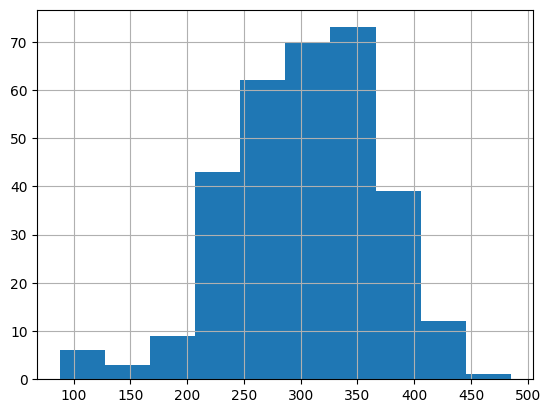

In [9]:
# 学力試験の点数(score)の分布の確認
s_df["score"].hist()

In [10]:
# リーダー気質フラグ(leader_flag)の確認
s_df["leader_flag"].value_counts()

leader_flag
0    301
1     17
Name: count, dtype: int64

In [11]:
# 特別支援フラグ(support_flag)の確認
s_df["support_flag"].value_counts()

support_flag
0    314
1      4
Name: count, dtype: int64

In [12]:
# student_pairs.csvからの特定ペアデータの取得
s_pair_df = pd.read_csv("student_pairs.csv")
print(len(s_pair_df))
s_pair_df

3


,student_id1,student_id2
0,118,189
1,72,50
2,314,233


In [13]:
# PythonライブラリPuLPの取り込み
import pulp

In [14]:
# 数理モデルのインスタンス作成
prob = pulp.LpProblem("ClassAssignmentProblem", pulp.LpMaximize)

In [15]:
# 生徒のリスト
S = s_df["student_id"].tolist()
print(S)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [16]:
# クラスのリスト
C = ["A", "B", "C", "D", "E", "F", "G", "H"]
C

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [17]:
# 生徒とクラスのペアのリスト
SC = [(s, c) for s in S for c in C]
print(SC[:30])

[(1, 'A'), (1, 'B'), (1, 'C'), (1, 'D'), (1, 'E'), (1, 'F'), (1, 'G'), (1, 'H'), (2, 'A'), (2, 'B'), (2, 'C'), (2, 'D'), (2, 'E'), (2, 'F'), (2, 'G'), (2, 'H'), (3, 'A'), (3, 'B'), (3, 'C'), (3, 'D'), (3, 'E'), (3, 'F'), (3, 'G'), (3, 'H'), (4, 'A'), (4, 'B'), (4, 'C'), (4, 'D'), (4, 'E'), (4, 'F')]


In [18]:
# 生徒をどのクラスに割り当てるかを表す 0–1 変数を定義する
# SC は (student_id, class_label) のペアの集合（直積集合）だと仮定している。
# 例えば SC = {(1, 'A'), (1, 'B'), ..., (4, 'F')} のように、
# 「生徒 i をクラス k に入れる」という全ての候補ペアが入っている。
#
# x[(i, k)] の意味：
#   x[(i, k)] = 1 なら「生徒 i をクラス k に割り当てる」
#   x[(i, k)] = 0 なら「生徒 i をクラス k に割り当てない」
#
# これは典型的な割当問題（assignment problem）の定式化で使われる 0–1 整数変数であり、
# 後で「各生徒はちょうど 1 クラスに所属する」「各クラスの定員を超えない」などの制約を
# x[(i, k)] を使って線形制約として記述できるようになる。
x = pulp.LpVariable.dicts("x", SC, cat="Binary")

In [19]:
# (1) 各生徒はちょうど 1 つのクラスに割り当てる制約
# 数学的には、各生徒 s ∈ S について
#   Σ_{c ∈ C} x_{s,c} = 1
# を課している。
# ここで x_{s,c} は「生徒 s をクラス c に割り当てるなら 1、そうでなければ 0」の 0–1 変数。
#
# この制約により：
# - 生徒 s はどこか 1 つのクラスに必ず所属する（左辺が 0 ではなく 1 になる）
# - かつ複数クラスにまたがって所属することはできない（2 以上にはならない）
# という「排他的かつ網羅的」な割当条件を、線形等式制約の形で表現している。
for s in S:
    prob += pulp.lpSum([x[s, c] for c in C]) == 1

In [20]:
# (2) 各クラスの生徒数を 39〜40 人に制限する制約
# 数学的には、各クラス c ∈ C について
#   39 ≤ Σ_{s ∈ S} x_{s,c} ≤ 40
# を課していることになる。
#
# ここで Σ_{s ∈ S} x_{s,c} は「クラス c に割り当てられた生徒数」を表す。
# なぜなら x_{s,c} が「生徒 s をクラス c に入れると 1、入れないと 0」の 0–1 変数だからである。
#
# 下の 2 行の制約は、それぞれ
#   Σ_{s ∈ S} x_{s,c} ≥ 39
#   Σ_{s ∈ S} x_{s,c} ≤ 40
# に対応しており、この 2 つを同時に課すことでクラス c の人数が
# 「最低 39 人、最大 40 人」という狭い範囲に収まるようにしている。
#
# また、x_{s,c} が 0–1 変数であることから、Σ_{s ∈ S} x_{s,c} は必ず整数になり、
# 「39.5 人」などの意味のない値は絶対に出てこない。
# これは整数計画（0–1 整数計画）の重要な性質であり、
# 現実世界の「人数」や「台数」といった離散量を自然に表現できる理由でもある。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S]) >= 39
    prob += pulp.lpSum([x[s, c] for s in S]) <= 40

In [21]:
# 男子生徒のリスト
# s_df は「生徒 ID と属性（gender など）」を持つデータフレームだと仮定している。
# itertuples() で各行をタプルとして取り出し、gender == 1 であればその student_id を取り出している。
#
# ここで gender == 1 を「男子」とみなしている：
#   S_male = { s ∈ S | gender_s = 1 }
# という集合を構成しているイメージ。
# この集合は後の制約で「男子だけを数える」ときに使われる。
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
# 上と同様に、gender == 0 を「女子」とみなして、
#   S_female = { s ∈ S | gender_s = 0 }
# という部分集合を構成している。
# これにより、「女子だけの人数制約」を書くときに集合 S_female を使えるようになる。
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は 20 人以下とする制約
# 数学的には、各クラス c ∈ C について
#
#   Σ_{s ∈ S_male} x_{s,c} ≤ 20
#   Σ_{s ∈ S_female} x_{s,c} ≤ 20
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つので、
#
#   Σ_{s ∈ S_male} x_{s,c}
#
# は「クラス c に所属している男子生徒の人数」を表し、
#
#   Σ_{s ∈ S_female} x_{s,c}
#
# は「クラス c に所属している女子生徒の人数」を表すことになる。
#
# よって、この制約は
#   - どのクラスも男子は最大 20 人
#   - どのクラスも女子は最大 20 人
# を保証しており、「男女比が極端に偏らないクラス編成」という
# 公平性・バランスの条件を線形制約として実装したものになっている。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s, c] for s in S_female]) <= 20

In [22]:
# 学力（テストの素点）を辞書表現に変換
# s_df は「student_id と score（学力試験の点数）」を含むデータフレームと仮定する。
# この内包表記により、
#   score[s] = その生徒 s の得点
# という形でアクセスできる辞書を作っている。
# 後で「クラスごとの総得点」を線形結合で書くときに、この score[s] を係数として利用する。
score = {row.student_id: row.score for row in s_df.itertuples()}

# 学年全体の平均点（スカラー）を算出
# これは「比較基準となるターゲット平均値」であり、
# 各クラスの平均点がこの値 ±10 点の範囲に入るように制約を課す。
score_mean = s_df["score"].mean()
print(score_mean)

# (4) 各クラスの学力試験の平均点は学年平均点 ±10 点とする制約
# 理論的には、各クラス c ∈ C について
#
#   クラス c の平均点
#     = (クラス c の総得点) / (クラス c の人数)
#
# が、学年平均 score_mean を中心に ±10 の範囲に収まるようにしたい。
#
# クラス c の総得点：
#   Σ_{s ∈ S} x_{s,c} * score_s
#
# クラス c の人数：
#   Σ_{s ∈ S} x_{s,c}
#
# なので、本来課したい条件は
#
#   score_mean - 10 ≤ (Σ_{s} x_{s,c} score_s) / (Σ_{s} x_{s,c}) ≤ score_mean + 10
#
# である。
# これは「平均値に対する条件」なので、本質的には比（分数）の不等式になっており、
# そのままでは線形でないように見える。
#
# しかし、両辺にクラス人数 Σ_{s} x_{s,c} を掛けることで
#
#   (score_mean - 10) * Σ_{s} x_{s,c}
#       ≤ Σ_{s} x_{s,c} score_s
#       ≤ (score_mean + 10) * Σ_{s} x_{s,c}
#
# という形に書き換えられる。この形は「係数 × 変数の和」だけからなる線形不等式である。
# したがって、線形計画（整数計画）モデルにそのまま組み込むことができる。
#
# ここでは、左側・右側の不等式をそれぞれ別の制約として実装している。
# なお、別の制約群で「各クラスの人数が 39〜40 人」という条件をすでに課しているため、
# Σ_{s} x_{s,c} が 0（クラスに誰もいない）になることはなく、
# 上記の「平均値の意味」が破綻しないようになっている点も理論的に重要である。
for c in C:
    # 下側の制約：
    #   (score_mean - 10) * Σ_{s} x_{s,c} ≤ Σ_{s} x_{s,c} score_s
    # → クラス平均が score_mean - 10 以上
    prob += (score_mean - 10) * pulp.lpSum([x[s, c] for s in S]) <= pulp.lpSum(
        [x[s, c] * score[s] for s in S]
    )

    # 上側の制約：
    #   Σ_{s} x_{s,c} score_s ≤ (score_mean + 10) * Σ_{s} x_{s,c}
    # → クラス平均が score_mean + 10 以下
    prob += pulp.lpSum([x[s, c] * score[s] for s in S]) <= (
        score_mean + 10
    ) * pulp.lpSum([x[s, c] for s in S])

303.6446540880503


In [23]:
# リーダー気質の生徒の集合
# s_df は生徒ごとの属性（student_id, leader_flag など）を持つデータフレームと仮定している。
# leader_flag == 1 の生徒を「リーダー気質あり」とみなし、
#   S_leader = { s ∈ S | leader_flag_s = 1 }
# という部分集合を構成しているイメージ。
# この集合を使うことで、「リーダー気質の生徒だけを数える」制約を簡潔に記述できる。
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5) 各クラスにリーダー気質の生徒を 2 人以上割り当てる制約
# 数学的には、各クラス c ∈ C について
#
#   Σ_{s ∈ S_leader} x_{s,c} ≥ 2
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つ。
#
# よって Σ_{s ∈ S_leader} x_{s,c} は
#   「クラス c に在籍しているリーダー気質の生徒の人数」
# を表す。「2 以上」という下限制約により、どのクラスにも最低 2 人のリーダー候補がいることが保証され、
# クラス内の役割分担やグループワークの推進役が不足しないような編成を、整数計画モデルとして実現している。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_leader]) >= 2

In [24]:
# 特別な支援が必要な生徒の集合
# s_df は、生徒ごとの属性（student_id, support_flag など）を持つデータフレームと仮定している。
# support_flag == 1 の生徒を「特別な支援が必要な生徒」とみなし、
#   S_support = { s ∈ S | support_flag_s = 1 }
# という部分集合を構成しているイメージ。
# この集合を使うことで、「支援が必要な生徒だけ」を数える線形制約を簡潔に書くことができる。
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに 1 人以下とする制約
# 数学的には、各クラス c ∈ C について
#
#   Σ_{s ∈ S_support} x_{s,c} ≤ 1
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つ。
#
# したがって Σ_{s ∈ S_support} x_{s,c} は、
#   「クラス c に在籍している、特別な支援が必要な生徒の人数」
# を表すことになる。
#
# それを 1 以下に制限することで、
#   - どのクラスにも支援が必要な生徒が「多すぎて教員の負担が集中する」状況を避ける
#   - 支援リソースをクラス間で平等に分散する
# といった運営上のポリシーを、整数計画モデルの制約として形式的に表現している。
#
# この制約は、リーダー配置制約（各クラスに S_leader を 2 人以上）などと組み合わさることで、
# 「負荷と役割のバランスがとれたクラス編成」という全体構造に寄与する。
for c in C:
    prob += pulp.lpSum([x[s, c] for s in S_support]) <= 1

In [25]:
# 生徒の特定ペアリスト
# s_pair_df は「一緒のクラスにしてはいけない生徒ペア」の一覧を持つデータフレームと仮定している。
# 例えば列名が (student_id1, student_id2) で、
#   student_id1 と student_id2 は同じクラスに入れたくない（トラブル回避、配慮など）
# といったペア情報が行として並んでいるイメージ。
#
# この内包表記により、
#   SS = { (s1, s2), ... }
# という形で、生徒 ID のペアのリストを作っている。
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない制約
# 数学的には、各ペア (s1, s2) ∈ SS と各クラス c ∈ C について
#
#   x_{s1,c} + x_{s2,c} ≤ 1
#
# を課している。
#
# ここで x_{s,c} は 0–1 変数であり、
#   x_{s,c} = 1 なら「生徒 s をクラス c に割り当てる」
#   x_{s,c} = 0 なら「割り当てない」
# という意味を持つ。
#
# このとき、もし s1 と s2 の両方を同じクラス c に入れようとすると、
#   x_{s1,c} = 1 かつ x_{s2,c} = 1
# となり、左辺 x_{s1,c} + x_{s2,c} = 2 > 1 となって制約違反になる。
# したがって「同一クラスに同居すること」は禁止される。
#
# 一方で、
#   - 片方だけクラス c に所属する（もう片方は別クラス）場合は、
#     x_{s1,c} + x_{s2,c} = 1 ≤ 1 なので許容される。
#   - どちらもそのクラスに所属しない場合は 0 ≤ 1 なので当然許容される。
#
# このように、この制約は「特定ペアを同じクラスにしない」という
# 論理的な条件（排他的条件）を、線形の 0–1 制約として表現したものになっている。
# これは 0–1 整数計画で頻出するパターンで、
#   「2つのバイナリ変数を同時に 1 にしてはいけない」
# という関係を一般に
#   x + y ≤ 1
# の形で書く典型例である。
for s1, s2 in SS:
    for c in C:
        prob += x[s1, c] + x[s2, c] <= 1

In [ ]:
# 求解
status = prob.solve()
print(status)
print(pulp.LpStatus[status])

In [27]:
# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s, c].value() == 1]

for c, Ss in C2Ss.items():
    print("Class:", c)
    print("Num:", len(Ss))
    print("Student:", Ss)
    print()

Class: A
Num: 39
Student: [2, 9, 19, 39, 42, 63, 65, 71, 79, 83, 85, 88, 99, 109, 111, 123, 126, 136, 138, 145, 148, 165, 168, 173, 177, 179, 180, 193, 199, 206, 224, 233, 240, 246, 264, 267, 291, 292, 298]

Class: B
Num: 40
Student: [11, 15, 43, 48, 50, 70, 82, 89, 91, 102, 104, 113, 114, 120, 121, 124, 127, 146, 149, 159, 167, 170, 172, 176, 190, 203, 213, 220, 222, 231, 238, 245, 263, 270, 275, 276, 283, 287, 290, 317]

Class: C
Num: 40
Student: [3, 14, 23, 27, 31, 33, 41, 49, 53, 54, 58, 73, 93, 97, 98, 107, 122, 152, 156, 160, 171, 187, 201, 210, 211, 217, 219, 227, 236, 242, 254, 258, 260, 268, 273, 274, 277, 278, 301, 318]

Class: D
Num: 40
Student: [10, 13, 16, 36, 37, 51, 56, 59, 61, 67, 68, 75, 84, 92, 108, 128, 134, 139, 140, 158, 161, 175, 183, 188, 192, 198, 200, 205, 221, 225, 235, 241, 252, 255, 256, 257, 261, 266, 293, 316]

Class: E
Num: 39
Student: [4, 5, 21, 22, 24, 38, 69, 72, 78, 87, 96, 105, 106, 115, 129, 132, 141, 143, 150, 154, 164, 166, 184, 189, 195, 196, 197